In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

# Task 1

We have the min and max temperatures in a city in India for each months of the year. We would like to find a function to describe this and show it graphically , the dataset given below .


- Fitting it to the periodic function

- Plot the fit

In [15]:
df = pd.DataFrame({'Max' : [39,41,43,47,49,51,45,38,37,29,27,25] ,
                    'Min' : [21,23,27,28,32,35,31,28,21,19,17,18]})
df.head()

,Max,Min
0,39,21
1,41,23
2,43,27
3,47,28
4,49,32


# Fitting it to the periodic function


In [7]:
from scipy import optimize

In [21]:
months = np.arange(12)

In [22]:
def yearly_temps(times , avg , ampl , time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi/times.max()))


In [23]:
res_max , cov_max = optimize.curve_fit(yearly_temps , months , df['Max'] , [40 , 20 , 0])

res_min , cov_min = optimize.curve_fit(yearly_temps , months , df['Min'] , [-40,20 , 0])

print(res_max)
print(res_min)

[ 39.10062829 -11.0872493    2.10332481]
[24.87112259 -7.8989966   1.60673368]


# Plot Min And Max Temperature

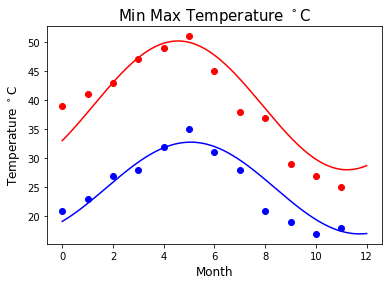

In [24]:
days = np.linspace(0,12, num = 365)
plt.plot(months , df['Max'] , 'ro')
plt.plot(days , yearly_temps(days , *res_max) , 'r-')
plt.plot(months , df['Min'] , 'bo')
plt.plot(days , yearly_temps(days , *res_min), 'b-')
plt.xlabel("Month" , fontsize = 12)
plt.ylabel("Temperature $^\circ$C" , fontsize = 12)
plt.title('Min Max Temperature $^\circ$C' , fontsize=15)
plt.show()

# Task 2

This assignment is for visualization using matplotlib: data to use: url= https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv titanic = pd.read_csv(url) Charts to plot:

In [5]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Create a pie chart presenting the male and female proportion

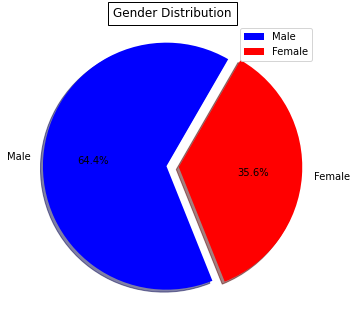

In [29]:
gender_val = ['Male','Female']
gender = titanic['sex'].value_counts()

gender = gender.astype(float)
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes((0,0,0.5,1))
ax.set_title('Gender Distribution' , bbox={'facecolor':'white','pad':5})
labels = 'Male','Female'
colors = ['blue' , 'red']
explode = (0.1 , 0)
plt.pie(gender , explode = explode , labels = labels , colors = colors , autopct = '%1.1f%%' , shadow = True ,
       startangle = 60)
plt.legend(labels = gender_val)
plt.axis('equal')
plt.show()